# Explore here

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()



True

In [16]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [17]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [24]:
artist_id = "3TVXtAsR1Inumwj472S9r4"  

results = spotify.artist_top_tracks(artist_id)

tracks = []
for track in results['tracks'][:10]:  
    tracks.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms']  
})


df = pd.DataFrame(tracks)
df['duration_min'] = df['duration_ms'] / 60000 
df = df.sort_values('popularity', ascending=False) 
print(df[['name', 'popularity', 'duration_min']])



                              name  popularity  duration_min
0                            NOKIA          93      4.017050
1                       DIE TRYING          89      3.257183
2                        One Dance          88      2.899767
4                     Passionfruit          85      4.982333
5  WAIT FOR U (feat. Drake & Tems)          84      3.164883
6                       God's Plan          84      3.316217
8                      GIMME A HUG          83      3.217567
7                        Headlines          83      3.933100
9                         CN TOWER          82      4.031483
3                         She Will          81      5.097333


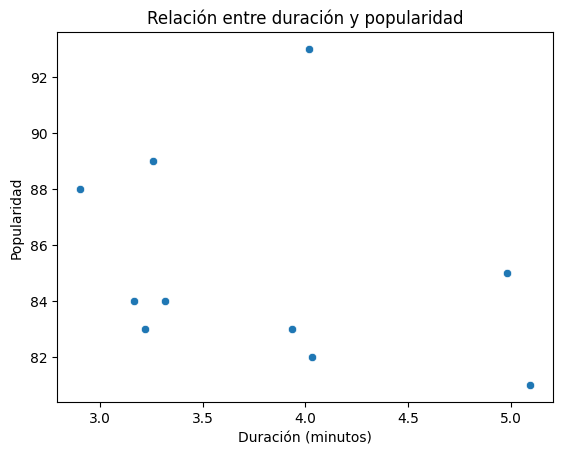

In [19]:
sns.scatterplot(data=df, x='duration_min', y='popularity')
plt.title("Relación entre duración y popularidad")
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.show()